In [86]:
import pandas as pd 
import numpy as np

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold  ## for regression
from sklearn.model_selection import StratifiedKFold ## recommended for classification
from sklearn.model_selection import cross_val_score## a quick way to do Cross_validation
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

import matplotlib.pyplot as plt
import seaborn as sns





## Train the model

In [2]:
def plot_roc_curve(fpr,tpr,roc_auc):
    """fpr is False Positive Rate
        tpr is True positive Rate
    """
    plt.figure()
    lw = 2 # line width
    plt.figure(figsize = (6,6))
    plt.plot(fpr,tpr,color = 'darkorange',
            lw = lw, label = 'ROC curve (area = %0.2f)'% roc_auc)
    plt.plot([0,1],[0,1],color = 'navy',lw = lw, linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.xlabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()
    
    

In [3]:
train = pd.read_csv('option_train.csv')
test = pd.read_csv('option_test_wolabel.csv')

In [4]:
train.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420,0.341270,0.03013,Under
1,0.125000,427.015526,465,0.166667,0.03126,Over
2,20.691244,427.762336,415,0.265873,0.03116,Under
3,1.035002,451.711658,460,0.063492,0.02972,Over
4,39.553020,446.718974,410,0.166667,0.02962,Under


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1680 non-null   float64
 1   S       1680 non-null   float64
 2   K       1680 non-null   int64  
 3   tau     1680 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 78.9+ KB


In [6]:
## covert to numeric binary class
train['BS_binary'] = np.where(train['BS'] =='Over',1,0)
train.head()

,Value,S,K,tau,r,BS,BS_binary
0,21.670404,431.623898,420,0.341270,0.03013,Under,0
1,0.125000,427.015526,465,0.166667,0.03126,Over,1
2,20.691244,427.762336,415,0.265873,0.03116,Under,0
3,1.035002,451.711658,460,0.063492,0.02972,Over,1
4,39.553020,446.718974,410,0.166667,0.02962,Under,0


In [7]:
train.drop('BS',inplace= True,axis = 1)


In [89]:
train.head()

,Value,S,K,tau,r,BS_binary
0,21.670404,431.623898,420,0.341270,0.03013,0
1,0.125000,427.015526,465,0.166667,0.03126,1
2,20.691244,427.762336,415,0.265873,0.03116,0
3,1.035002,451.711658,460,0.063492,0.02972,1
4,39.553020,446.718974,410,0.166667,0.02962,0


In [90]:
X_train = train.iloc[:,1:5]
y_train = train.iloc[:,5]

### Logistic Regression

In [96]:
lr_r1 = LogisticRegression().fit(X_train,y_train)

In [97]:
## scoring is accuracy, can also try ROCAUC
## by default, cross_val_score does not shuffle data, need to specify how we want to divide the folds if we want shuffled
## in this case kfolds is the definded shuffle way 
kfolds = StratifiedKFold(n_splits = 10,random_state = 1, shuffle  = True)
## a random state is set for reproducibility purpose
error_lr_r1_cv = cross_val_score(lr_r1,X_train,y_train,cv = 10, scoring = 'accuracy' )
error_lr_r1_cv 

array([0.92261905, 0.9047619 , 0.91666667, 0.89880952, 0.89880952,
       0.89880952, 0.9047619 , 0.91666667, 0.89880952, 0.91071429])

In [98]:
train.columns

Index(['Value', 'S', 'K', 'tau', 'r', 'BS_binary'], dtype='object')

### Naive Bayes

In [92]:
model_nb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [93]:
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
y_pred_proba_nb = model_nb.predict_proba(X_test)[:, 1]

In [94]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9077380952380952


In [95]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba_nb)
print('Train/Test split results:')
print(model_nb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(model_nb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_nb))
print(model_nb.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
GaussianNB accuracy is 0.908
GaussianNB log_loss is 0.271
GaussianNB auc is 0.955


In [96]:
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(model_nb.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(model_nb.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on training set: 0.88
Accuracy of Naive Bayes classifier on test set: 0.91


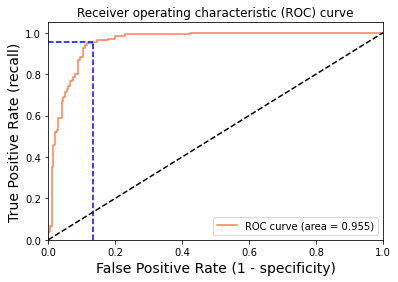

In [97]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [98]:
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Using a threshold of 0.417 guarantees a sensitivity of 0.956 and a specificity of 0.865, i.e. a false positive rate of 13.50%.


### KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(3,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

print(f'Train Accuracy:{train_accuracy}')
print(f'Test Accuracy:{test_accuracy}')


Train Accuracy:[0.94345238 0.9327381  0.92797619 0.92797619 0.925      0.92678571]
Test Accuracy:[0.9702381  0.94047619 0.92261905 0.92857143 0.92857143 0.92857143]


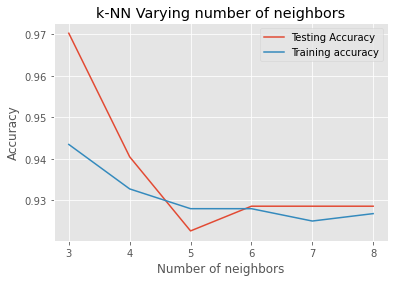

In [116]:
plt.style.use('ggplot')
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k= 3. So lets create a KNeighborsClassifier with number of neighbors as 3.

In [129]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
#Get accuracy. 
knn.score(X_test,y_test)

0.9702380952380952

In [130]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[92,  2],
       [ 3, 71]])

In [119]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,92,2,94
1,3,71,74
All,95,73,168


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.97      0.96      0.97        74

    accuracy                           0.97       168
   macro avg       0.97      0.97      0.97       168
weighted avg       0.97      0.97      0.97       168



In [122]:
## try to use GridSearchCV to determin K 

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [123]:
knn_cv.best_score_

0.9136904761904763

In [124]:
knn_cv.best_params_

{'n_neighbors': 46}

Thus a knn classifier with number of neighbors as 31 achieves the best score/accuracy of 0.93333 i.e about 93%

### SVM

In [145]:
#https://www.kaggle.com/prashant111/svm-classifier-tutorial
##In the context of SVMs, there are 4 popular kernels 
##– Linear kernel,Polynomial kernel,
##Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [146]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC(gamma = 'auto') 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9107


In [147]:
#Default Linear kernel

svc=SVC(kernel='linear', C= 1.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with  linear kernel and C = 1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with  linear kernel and C = 1.0 : 0.9286


In [148]:
svc=SVC(kernel='linear', C= 100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with linear kernel and C = 100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with linear kernel and C = 100.0: 0.9226


In [149]:
svc=SVC(kernel='linear', C= 1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with linear kernel and C = 1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with linear kernel and C = 1000.0: 0.9226


In [150]:
#Default RBF kernel

svc=SVC(kernel='rbf', gamma = 'auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default rbf kernel: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default rbf kernel: 0.9107


In [151]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(kernel='rbf', C=100.0, gamma = 'auto') 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9643


In [152]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(kernel='rbf', C=1000.0, gamma = 'auto') 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9702


In [ ]:
#Default Polynomial kernel

svc=SVC(kernel='poly', C = 1.0, gamma = 'auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default Polynomial kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
svc=SVC(kernel='poly', C = 100.0, gamma = 'auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with Polynomial kernel and C = 100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
y_pred_train = svc.predict(X_train)

y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

The training-set accuracy score is 0.9325 while the test-set accuracy to be 0.9345. These two values are quite comparable. So, there's no question of overfitting.

### Random Forest

In [99]:
rfc_r1 = RandomForestClassifier().fit(X_train,y_train)

In [100]:
y_score_r1_rfc  = rfc_r1.predict_proba(test)[:,1]

### Decision Tree

In [101]:
#https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset
## using Gini impurity to evaluate splits
##Gini Impurity measures the disorder of a set of elements. 
## It is calculated as the probability of mislabelling an element assuming that the element is randomly labelled according the the distribution of all the classes in the set. 
## Decision Trees will try to find the split which decreases Gini Impurity the most across the two resulting nodes. 

# Define function to calculate Gini Impurity
def get_gini_impurity(true_count, total_count):
    true_prob = true_count/total_count
    false_prob = (1 - true_prob)
    random_observation_true_prob = true_prob
    random_observation_false_prob = (1 - random_observation_true_prob)
    mislabelling_true_prob = false_prob * random_observation_true_prob
    mislabelling_false_prob = true_prob * random_observation_false_prob
    gini_impurity = mislabelling_true_prob + mislabelling_false_prob
    return gini_impurity

In [102]:
X_train.shape

(1680, 4)

In [103]:
(y_train ==1).sum()

734

In [104]:
## Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(734, 1680)
gini_impurity_starting_node

0.49203798185941044

In [105]:
train.columns

Index(['Value', 'S', 'K', 'tau', 'r', 'BS_binary'], dtype='object')

In [106]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test)) ## the number of attributes, in this project, 4
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
    print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['BS_binary'], axis=1), 
                               y = f_train['BS_binary']) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['BS_binary'], axis=1), 
                                y = f_valid["BS_binary"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    print("Accuracy per fold: ", fold_accuracy, "\n")
    print("Average accuracy: ", avg)
    print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

Current max depth:  1 

Accuracy per fold:  [0.9285714285714286, 0.9345238095238095, 0.9226190476190477, 0.9047619047619048, 0.9404761904761905, 0.8988095238095238, 0.9047619047619048, 0.8988095238095238, 0.9107142857142857, 0.8988095238095238] 

Average accuracy:  0.9142857142857143


Current max depth:  2 

Accuracy per fold:  [0.9226190476190477, 0.9226190476190477, 0.9107142857142857, 0.9166666666666666, 0.9285714285714286, 0.8988095238095238, 0.9047619047619048, 0.8809523809523809, 0.9107142857142857, 0.8988095238095238] 

Average accuracy:  0.9095238095238096


Current max depth:  3 

Accuracy per fold:  [0.9345238095238095, 0.9285714285714286, 0.9166666666666666, 0.9226190476190477, 0.9345238095238095, 0.9047619047619048, 0.9285714285714286, 0.8988095238095238, 0.9166666666666666, 0.8928571428571429] 

Average accuracy:  0.9178571428571429


Current max depth:  4 

Accuracy per fold:  [0.9166666666666666, 0.9166666666666666, 0.9285714285714286, 0.9226190476190477, 0.928571428571

In [108]:

# Create Decision Tree with max_depth = 3
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)


### XGboost

In [103]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
model_nb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]



/Users/xinxuegu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:30:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [104]:
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba_xgb)
print('Train/Test split results:')
print(xgb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, pred_xgb))
print(xgb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_xgb))
print(xgb.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

Train/Test split results:
XGBClassifier accuracy is 0.946
XGBClassifier log_loss is 0.150
XGBClassifier auc is 0.991


In [105]:
print('Accuracy of XGboost classifier on training set: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Accuracy of XGboost classifier on test set: {:.2f}'
     .format(xgb.score(X_test, y_test)))

Accuracy of XGboost classifier on training set: 1.00
Accuracy of XGboost classifier on test set: 0.95


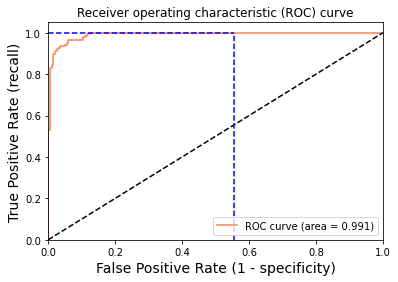

In [106]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr1, tpr1, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr1[idx]], [tpr1[idx],tpr1[idx]], 'k--', color='blue')
plt.plot([fpr1[idx],fpr1[idx]], [0,tpr1[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [107]:
print("Using a threshold of %.3f " % thr1[idx] + "guarantees a sensitivity of %.3f " % tpr1[idx] +  
      "and a specificity of %.3f" % (1-fpr1[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr1[idx])*100))

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.445, i.e. a false positive rate of 55.50%.


In [ ]:
#fangfei

## Cross Validation

### 10 folds

In [29]:
from sklearn.model_selection import KFold  ## for regression
from sklearn.model_selection import StratifiedKFold ## recommended for classification
from sklearn.model_selection import cross_val_score ## a quick way to do Cross_validation
from sklearn.metrics import roc_curve,auc

In [143]:
## smf logistic regression model 
# cv_classification_errors_1 = []
# cv_auc_1 = []
# for train_index,test_index in kfolds.split(train, train['BS_binary']):
#     result = smf.logit('BS_binary ~ S+K+tau+r',data = train,subset= train_index).fit()
    
#     X_test = train.loc[test_index,['S', 'K', 'tau', 'r']]
#     y_test = train.loc[test_index,'BS_binary']
    
#     result_prob = result.predict(X_test)
#     result_pred = (result_prob >0.5)
    
#     classifiction_error = np.mean(result_pred!=y_test)
#     cv_classification_errors_1.append(classifiction_error)
    
#     fpr,tpr,threshold =roc_curve(y_test,result_prob)
    
#     roc_auc = auc(fpr,tpr)
    
#     cv_auc_1.append(roc_auc)
    
# print('Mean of classification errore using 10-fold CV: {}\n'
#       .format(np.mean(cv_classification_errors_1)))  
# print('Mean of auc using 10-fold CV: {}\n'
#       .format(np.mean(cv_auc_1)))

In [108]:
## selected sklearn models

logistic_model = LogisticRegression(penalty='none',max_iter= 10000)
   
random_forest = RandomForestClassifier()

decision_tree = DecisionTreeClassifier(max_depth = 3)

knn3 = KNeighborsClassifier(n_neighbors=3)

knn46 = KNeighborsClassifier(n_neighbors=46)

svc=SVC(kernel='rbf', C=1000.0, gamma = 'auto') 

naive_bayes = GaussianNB()

xgboost = XGBClassifier(n_estimators=100)



In [38]:
models_10fold = pd.DataFrame(columns = ['model','classification error'])

In [122]:
kfold  = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

In [123]:
def ten_fold_cv(model,n,X,y):
    """
    n is the identifier of model
    """
    score = cross_val_score(model, 
                                  X,y,
                                  cv = kfold,scoring='accuracy')
    models_10fold.loc[n,'model'] = str(model)
    models_10fold.loc[n,'classification error'] = 1-np.mean(score)
    print(f'\n{model}:\n')
    print('accuracy of 10-folds',score,'\n(mean classification error:)',1-np.mean(score),')')

In [101]:
X =  train[['S', 'K', 'tau', 'r']]
y = train['BS_binary']

In [62]:
## for now random forest is better

In [124]:
ten_fold_cv(logistic_model,0,X,y)
ten_fold_cv(naive_bayes,1,X,y)
ten_fold_cv(random_forest,2,X,y)
ten_fold_cv(decision_tree,3,X,y)
ten_fold_cv(knn3,4,X,y)
ten_fold_cv(knn46,5,X,y)
ten_fold_cv(svc,6,X,y)
ten_fold_cv(xgboost,7,X,y)


LogisticRegression(max_iter=10000, penalty='none'):

accuracy of 10-folds [0.94642857 0.92857143 0.92261905 0.875      0.92261905 0.91666667
 0.88095238 0.89880952 0.88690476 0.9047619 ] 
(mean classification error:) 0.09166666666666679 )

GaussianNB():

accuracy of 10-folds [0.92857143 0.9047619  0.88690476 0.82142857 0.91071429 0.88690476
 0.86309524 0.85714286 0.875      0.875     ] 
(mean classification error:) 0.11904761904761896 )

RandomForestClassifier():

accuracy of 10-folds [0.95238095 0.95238095 0.94047619 0.88690476 0.95833333 0.94047619
 0.86904762 0.94047619 0.9047619  0.92857143] 
(mean classification error:) 0.07261904761904758 )

DecisionTreeClassifier(max_depth=3):

accuracy of 10-folds [0.95833333 0.9047619  0.92261905 0.875      0.93452381 0.91666667
 0.86309524 0.89285714 0.9047619  0.89285714] 
(mean classification error:) 0.09345238095238106 )

KNeighborsClassifier(n_neighbors=3):

accuracy of 10-folds [0.94047619 0.89880952 0.88690476 0.875      0.92261905 0.8

/Users/xinxuegu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:35:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:35:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:35:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [110]:
models_10fold

,model,classification error
0,"LogisticRegression(max_iter=10000, penalty='no...",0.0916667
1,GaussianNB(),0.119048
2,RandomForestClassifier(),0.0696429
3,DecisionTreeClassifier(max_depth=3),0.0934524
4,KNeighborsClassifier(n_neighbors=3),0.105357
5,KNeighborsClassifier(n_neighbors=46),0.0880952
6,"SVC(C=1000.0, gamma='auto')",0.0994048
7,"XGBClassifier(base_score=None, booster=None, c...",0.0672619


In [111]:

models_10fold.to_csv('models_10foldsCV_noNorm.csv')

So Far random forest is the best

### LOOCV

In [ ]:
#https://www.kaggle.com/prashant111/svm-classifier-tutorial

Don’t Use LOOCV: Large datasets or costly models to fit.
Given the improved estimate of model performance, LOOCV is appropriate when an accurate estimate of model performance is critical. This particularly case when the dataset is small, such as less than thousands of examples, can lead to model overfitting during training and biased estimates of model performance.

Further, given that no sampling of the training dataset is used, this estimation procedure is deterministic, unlike train-test splits and other k-fold cross-validation confirmations that provide a stochastic estimate of model performance.

Use LOOCV: Small datasets or when estimated model performance is critical.
Once models have been evaluated using LOOCV and a final model and configuration chosen, a final model is then fit on all available data and used to make predictions on new data.

Now that we are familiar with the LOOCV procedure, let’s look at how we can use the method in Python.



In [112]:
models = pd.DataFrame(columns = ['model','classification error'])

In [61]:
# def LOOCV(model,n,X,y):
#     """
#     n is the identifier of model
#     """
    
#     score = cross_val_score(model, 
#                                    X,y,
#                                   cv = LeaveOneOut() ,scoring='accuracy')
#     models.loc[n,'model'] = str(model)
#     models.loc[n,'classification error'] = 1-np.mean(score)
#     print(f'\n{model}:\n')
#     print('accuracy of 10-folds',score,'\n(mean classification error:)',1-np.mean(score),')')
    
# ## if cv = int, then StratifiedKold is used 

In [32]:
# LOOCV(logistic_model,0,X,y)
# LOOCV(random_forest,1,X,y)
# LOOCV(decision_tree,2,X,y)
# LOOCV(knn3,3,X,y)
# LOOCV(knn46,4,X,y)
# LOOCV(svc,5,X,y)


LogisticRegression(max_iter=10000, penalty='none'):

accuracy of 10-folds [1. 1. 1. ... 1. 1. 1.] 
(mean classification error:) 0.0892857142857143 )

RandomForestClassifier():

accuracy of 10-folds [1. 1. 1. ... 1. 1. 1.] 
(mean classification error:) 0.06845238095238093 )

DecisionTreeClassifier(max_depth=3):

accuracy of 10-folds [1. 1. 1. ... 1. 1. 1.] 
(mean classification error:) 0.08511904761904765 )

KNeighborsClassifier(n_neighbors=3):

accuracy of 10-folds [1. 1. 1. ... 1. 1. 1.] 
(mean classification error:) 0.10119047619047616 )

KNeighborsClassifier(n_neighbors=46):

accuracy of 10-folds [1. 1. 1. ... 1. 1. 1.] 
(mean classification error:) 0.08869047619047621 )

SVC(C=1000.0, gamma='auto'):

accuracy of 10-folds [1. 1. 1. ... 1. 1. 1.] 
(mean classification error:) 0.09523809523809523 )


In [47]:
# models_10fold.to_csv('models_10foldsCV_noNorm.csv')

In [48]:
# models.to_csv('models_LOOCV_noNorm.csv')

### Normalization

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
train.head()

,Value,S,K,tau,r,BS_binary
0,21.670404,431.623898,420,0.341270,0.03013,0
1,0.125000,427.015526,465,0.166667,0.03126,1
2,20.691244,427.762336,415,0.265873,0.03116,0
3,1.035002,451.711658,460,0.063492,0.02972,1
4,39.553020,446.718974,410,0.166667,0.02962,0


In [115]:
X_train = train.iloc[:,1:5]
y_train = train.iloc[:,5]
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)

In [116]:
ten_fold_cv(logistic_model,0,X_train_std,y_train)
ten_fold_cv(naive_bayes,1,X,y)
ten_fold_cv(random_forest,2,X_train_std,y_train)
ten_fold_cv(decision_tree,3,X_train_std,y_train)
ten_fold_cv(knn3,4,X_train_std,y_train)
ten_fold_cv(knn46,5,X_train_std,y_train)
ten_fold_cv(svc,6,X_train_std,y_train)
ten_fold_cv(xgboost,7,X_train_std,y_train)



LogisticRegression(max_iter=10000, penalty='none'):

accuracy of 10-folds [0.94642857 0.94642857 0.92261905 0.88095238 0.93452381 0.92857143
 0.85714286 0.92261905 0.88095238 0.91666667] 
(mean classification error:) 0.08630952380952395 )

GaussianNB():

accuracy of 10-folds [0.92857143 0.9047619  0.88690476 0.82142857 0.91071429 0.88690476
 0.86309524 0.85714286 0.875      0.875     ] 
(mean classification error:) 0.11904761904761896 )

RandomForestClassifier():

accuracy of 10-folds [0.95238095 0.95238095 0.94047619 0.89880952 0.94642857 0.92857143
 0.88095238 0.93452381 0.91666667 0.94047619] 
(mean classification error:) 0.07083333333333341 )

DecisionTreeClassifier(max_depth=3):

accuracy of 10-folds [0.95833333 0.9047619  0.92261905 0.875      0.93452381 0.91666667
 0.86309524 0.89285714 0.9047619  0.89285714] 
(mean classification error:) 0.09345238095238106 )

KNeighborsClassifier(n_neighbors=3):

accuracy of 10-folds [0.95238095 0.93452381 0.91666667 0.89285714 0.95833333 0.9

/Users/xinxuegu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:33:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:33:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [117]:
models_10foldsCV_Norm = models_10fold
models_10foldsCV_Norm.to_csv('models_10foldsCV_Norm.csv')


In [118]:
models_10foldsCV_Norm

,model,classification error
0,"LogisticRegression(max_iter=10000, penalty='no...",0.0863095
1,GaussianNB(),0.119048
2,RandomForestClassifier(),0.0708333
3,DecisionTreeClassifier(max_depth=3),0.0934524
4,KNeighborsClassifier(n_neighbors=3),0.075
5,KNeighborsClassifier(n_neighbors=46),0.0744048
6,"SVC(C=1000.0, gamma='auto')",0.0815476
7,"XGBClassifier(base_score=None, booster=None, c...",0.0672619


In [ ]:
xgboost_2 = XGBClassifier(max_depth = 5,n_estimators=100)
ten_fold_cv(xgboost,7,X_train_std,y_train)

### 2.3 Ensemble model? votes?